In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from models import LSTNet
import importlib

from utils import *;
import Optim

#显示中文
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

data_path='D:/Codes/nCov/LSTNet-master/data/'

In [2]:
inputfile="D:/Codes/nCov/data/out_increase_province_2.20.csv"

# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 200)

#读取数据
dataf = pd.read_csv(inputfile, encoding='UTF-8')

In [16]:
#提取对应省份的数据
data_zhejiang=dataf.loc[dataf['省']=='浙江省'].iloc[:,1:4]
print(data_zhejiang)
#对数据进行处理，将数据中的负数消除
for index,data in data_zhejiang.iterrows():
    for name in data.iteritems():
        if name[1]<0:
            data_zhejiang.loc[index+1,name[0]]+=name[1]
            data_zhejiang.loc[index,name[0]]=0
data_zj=data_zhejiang.iloc[::-1]
data_zj.to_csv(data_path+'data_zhejiang_2.20.txt', header=0,index=False)

    新增死亡  新增治愈   新增确诊
0    1.0   9.0    1.0
1    0.0  69.0    2.0
2    0.0  28.0    1.0
3    0.0  51.0    4.0
4    0.0  28.0    5.0
5    0.0  25.0    7.0
6    0.0  43.0   10.0
7    0.0  39.0   14.0
8    0.0  51.0   14.0
9    0.0  28.0   25.0
10   0.0  41.0   17.0
11   0.0  26.0   27.0
12   0.0  52.0   42.0
13   0.0  29.0   52.0
14   0.0  16.0   59.0
15   0.0  16.0   66.0
16   0.0  19.0  105.0
17  -1.0  11.0   63.0
18   1.0  11.0   62.0
19   0.0   7.0   61.0
20   0.0  10.0  110.0
21   0.0   1.0  132.0
22   0.0   0.0  123.0
23   0.0   2.0   45.0
24   0.0   0.0   24.0
25   0.0   0.0   42.0
26   0.0   0.0   19.0
27   0.0   1.0   43.0


In [18]:
#提取对应省份的数据
data_hb=dataf.loc[dataf['省']=='湖北省'].iloc[:,1:4]
print(data_hb)
# data_hb.iloc[5,2]=(data_hb.iloc[4,2]+data_hb.iloc[6,2])/2
#对数据进行处理，将数据中的负数消除
for index,data in data_hb.iterrows():
    for name in data.iteritems():
        if name[1]<0:
            data_hb.loc[index+1,name[0]]+=name[1]
            data_hb.loc[index,name[0]]=0
data_hb=data_hb.iloc[::-1]
data_hb.to_csv(data_path+'data_hubei_reduced_2.20.txt', header=0,index=False)

     新增死亡    新增治愈     新增确诊
28  108.0  1017.0    349.0
29  132.0  1393.0   1693.0
30   93.0  1250.0   1807.0
31  100.0  1027.0   1933.0
32  139.0   845.0   1843.0
33   31.0   690.0   2420.0
34  116.0   672.0   3780.0
35  242.0   773.0  14840.0
36   94.0   376.0   1638.0
37  103.0   456.0   2097.0
38   91.0   374.0   2531.0
39   81.0   262.0   2147.0
40   81.0   351.0   2841.0
41   69.0   155.0   2447.0
42   70.0   175.0   2987.0
43   65.0   139.0   3156.0
44   64.0    98.0   2345.0
45   56.0    33.0   2103.0
46   45.0    99.0   1921.0
47   45.0    27.0   1347.0
48   42.0    51.0    903.0
49   37.0     3.0   1349.0
50   25.0    35.0    840.0
51   24.0     5.0   1291.0
52   24.0     5.0    365.0
53   13.0    10.0    328.0
54   15.0     1.0    181.0
55   24.0    31.0    549.0


     新增死亡  新增治愈   新增确诊
519   0.0   1.0   43.0
518   0.0   0.0   19.0
517   0.0   0.0   42.0
516   0.0   0.0   24.0
515   0.0   2.0   45.0
514   0.0   0.0  123.0
513   0.0   1.0  132.0
512   0.0  10.0  110.0
511   0.0   7.0   61.0
510   0.0  11.0   62.0
509   0.0  11.0   63.0
508   0.0  19.0  105.0
507   0.0  16.0   66.0
506   0.0  16.0   59.0
505   0.0  29.0   52.0
504   0.0  52.0   42.0
503   0.0  26.0   27.0
502   0.0  41.0   17.0
501   0.0  28.0   25.0
500   0.0  51.0   14.0
499   0.0  39.0   14.0
498   0.0  43.0   10.0
497   0.0  25.0    7.0
496   0.0  28.0    5.0
495   0.0  51.0    4.0
494   0.0   7.0    1.0


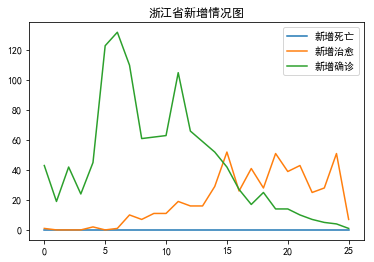

In [8]:
print(data_zj)
data_zj.plot(title='浙江省新增情况图',use_index=False)
plt.savefig('figure/zhejiang.png',dpi=500)
plt.show()

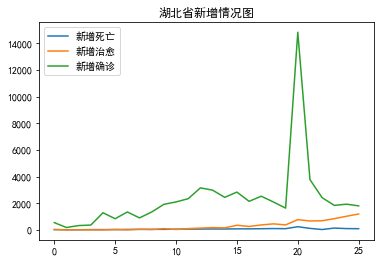

In [9]:
data_hb.plot(title='湖北省新增情况图',use_index=False)
plt.savefig('figure/hubei.png',dpi=500)
plt.show()

In [3]:
#读取模型
with open('save/zhejiang_200.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table('data/data_zhejiang.txt',header=None,sep=',')
data_zj=data_zj[::-1]
print(data_zj)

      0     1      2
25  0.0  28.0    1.0
24  0.0  51.0    4.0
23  0.0  28.0    5.0
22  0.0  25.0    7.0
21  0.0  43.0   10.0
20  0.0  39.0   14.0
19  0.0  51.0   14.0
18  0.0  28.0   25.0
17  0.0  41.0   17.0
16  0.0  26.0   27.0
15  0.0  52.0   42.0
14  0.0  29.0   52.0
13  0.0  16.0   59.0
12  0.0  16.0   66.0
11  0.0  19.0  105.0
10  0.0  11.0   63.0
9   0.0  11.0   62.0
8   0.0   7.0   61.0
7   0.0  10.0  110.0
6   0.0   1.0  132.0
5   0.0   0.0  123.0
4   0.0   2.0   45.0
3   0.0   0.0   24.0
2   0.0   0.0   42.0
1   0.0   0.0   19.0
0   0.0   1.0   43.0


      0     1      2
25  0.0   7.0    1.0
24  0.0  51.0    4.0
23  0.0  28.0    5.0
22  0.0  25.0    7.0
21  0.0  43.0   10.0
20  0.0  39.0   14.0
19  0.0  51.0   14.0
18  0.0  28.0   25.0
17  0.0  41.0   17.0
16  0.0  26.0   27.0
15  0.0  52.0   42.0
14  0.0  29.0   52.0
13  0.0  16.0   59.0
12  0.0  16.0   66.0
11  0.0  19.0  105.0
10  0.0  11.0   63.0
9   0.0  11.0   62.0
8   0.0   7.0   61.0
7   0.0  10.0  110.0
6   0.0   1.0  132.0
5   0.0   0.0  123.0
4   0.0   2.0   45.0
3   0.0   0.0   24.0
2   0.0   0.0   42.0
1   0.0   0.0   19.0
0   0.0   1.0   43.0


In [4]:
i=0
dt=data_zj.iloc[3-i:8-i,:]
dt=dt[::-1]
#预测的前5个值
first_5=dt
dt=dt.values
dt=np.expand_dims(dt,axis=0)
print(dt)
x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_5=pd.DataFrame(y)

[[[ 0. 28. 25.]
  [ 0. 51. 14.]
  [ 0. 39. 14.]
  [ 0. 43. 10.]
  [ 0. 25.  7.]]]


In [5]:
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(4):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_5=later_5.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)

In [6]:
predict_10=first_5.append(later_5).reset_index(drop=True)
print(predict_10)

          0          1          2
0  0.000000  28.000000  25.000000
1  0.000000  51.000000  14.000000
2  0.000000  39.000000  14.000000
3  0.000000  43.000000  10.000000
4  0.000000  25.000000   7.000000
5 -0.160560  20.436472  16.973679
6 -0.115334  14.915851  20.334579
7 -0.123910  14.633779  24.626015
8 -0.008986  13.809252  26.186333
9  0.055549  14.223135  27.546803


In [7]:
#读取真实值
data_true=pd.read_table('data/data_zhejiang_2.20.txt',header=None,sep=',')
data_true=data_true.iloc[-10:,:].reset_index(drop=True)

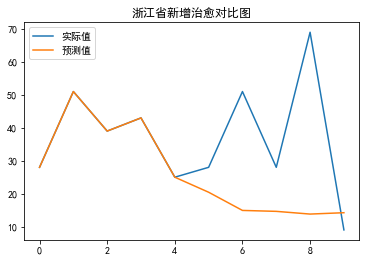

In [8]:
#显示新增治愈图像
plt.plot(data_true.iloc[:,1],label='实际值')
plt.plot(predict_10.iloc[:,1],label='预测值')
plt.legend()
plt.title('浙江省新增治愈对比图')
plt.savefig('figure/浙江省新增治愈对比图_300.png',dpi=500)

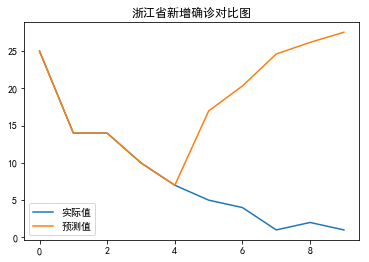

In [9]:
plt.plot(data_true.iloc[:,2],label='实际值')
plt.plot(predict_10.iloc[:,2],label='预测值')
plt.legend()
plt.title('浙江省新增确诊对比图')
plt.savefig('figure/浙江省新增确诊对比图_300.png',dpi=500)